<a href="https://colab.research.google.com/github/luciaPi/Neural-networks-course/blob/main/7UvodCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikácia Fashion-MNIST pomocou Konvolučnej neurónovej siete v Pythone

Knižnica: Tensorflow

![Fashion MNIST](https://github.com/margaretmz/deep-learning/blob/master/images/modern%20dl_fash-mnist_keras.png?raw=1)

## Dataset = vstupy + výstupy

![Dataset](https://drive.google.com/uc?id=1emGQXUM5iBTpq4gakgFsdYD5FX10yHSu)

## Fashion-MNIST dataset

*   28x28 čiernobiele obrázky
*   70 000 obrázkov (60 000 tréning, 10 000 test)
*   10 kategórií

<br> **Kategórie**

![Labels](https://drive.google.com/uc?id=1g14-UZkDVOaSkDlDX_ead1cNZ79M25xV)


## Stiahnutie fashion_mnist datasetu

**Dataset**
* x - vstup (obrázok)
* y - výstup (kategória)

In [1]:
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Vizualizovanie dát

In [2]:
# Print the number of training and test datasets
print('Train set:', x_train.shape[0], 'images')
print('Test set:', x_test.shape[0], 'images')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2
                        "Dress",        # index 3
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6
                        "Sneaker",      # index 7
                        "Bag",          # index 8
                        "Ankle boot"]   # index 9

Train set: 60000 images
Test set: 10000 images


Image index: 5  Label: 2 Pullover


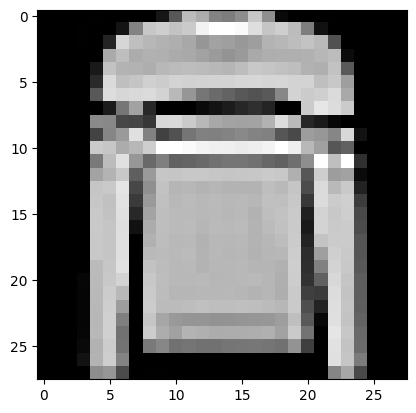

In [3]:
# Image index (number between 0 and 59 999)
img_index = 5

# y_train contains the lables (categories from 0 to 9)
label_index = y_train[img_index]
print('Image index:', img_index, ' Label:', label_index, fashion_mnist_labels[label_index])
plt.imshow(x_train[img_index], cmap='gray')

## Normalizácia dát
Dáta musia mať rozsah hodnôt od 0 do 1.

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

## Rozdelenie datasetu

*   Trénovacie dáta - tréning modelu
*   Validačné dáta - tuning parametrov modelu
*   Testovacie dáta - záverečné testovanie modelu

<img src="https://drive.google.com/uc?id=1njcCdtmdC7YXoYWMx-PtaZM4Eo0zs5ul" alt="Dataset" width=70%>

In [5]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('Train set:', x_train.shape[0], 'images')
print('Validation set:', x_valid.shape[0], 'images')
print('Test set:', x_test.shape[0], 'images')

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

Train set: 55000 images
Validation set: 5000 images
Test set: 10000 images


## Vytvorenie modelu

<img src="https://drive.google.com/uc?id=1rhtONHuZP2tF6ECEJtAzMy4lmAkozZ42" alt="Dataset" width=90%>

Vrstvy konvolučnej neurónovej siete:
*   Conv2D - konvolučná vrstva
*   Pooling - zmenšuje rozmer
*   Dropout - pridáva náhodnosť

Vrstvy neurónovej siete:
*   Flatten - z 2D do 1D
*   Dense - klasická vrstva

In [6]:
model = tf.keras.Sequential()

# Convolutional neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

# Neural network
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         401,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 412,778 (1.57 MB)

 Trainable params: 412,778 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

<img src="https://drive.google.com/uc?id=1yBd-KJFwc6QLW9C4dDmR-E-UnAboutmM" alt="Dataset" width=70%>

## Kompilácia modelu



In [7]:
model.compile(loss='categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=['accuracy'])

## Tréning modelu

Priebežne sa ukladá model na základe presnosti na validačnej množine. (checkpoint)

<img src="https://drive.google.com/uc?id=1-7oNniPjh4V6M5JaaYof9Hbf24ZiR7YZ" alt="Dataset" width=40%>


In [8]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='model.weights.h5', verbose = 1, save_best_only=True, save_weights_only=True)

model.fit(x_train, # training data - input(images)
         y_train, # training data - output(categories)
         batch_size=64,
         epochs=10, # training repetitions
         validation_data=(x_valid, y_valid), # validation set - input,output
         callbacks=[checkpointer])

# Load the weights with the best validation accuracy
model.load_weights('model.weights.h5')

Epoch 1/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6831 - loss: 0.8463
Epoch 1: val_loss improved from inf to 0.38968, saving model to model.weights.h5
860/860 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.6832 - loss: 0.8461 - val_accuracy: 0.8574 - val_loss: 0.3897
Epoch 2/10
854/860 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8407 - loss: 0.4336
Epoch 2: val_loss improved from 0.38968 to 0.32199, saving model to model.weights.h5
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8408 - loss: 0.4336 - val_accuracy: 0.8856 - val_loss: 0.3220
Epoch 3/10
857/860 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8625 - loss: 0.3790
Epoch 3: val_loss improved from 0.32199 to 0.30447, saving model to model.weights.h5
860/860 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8625 - loss: 0.3790 - val_accuracy: 0.8884 - val_loss: 0.3045
Epoch 4/10
852/860 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8691 - loss: 0.3606
Epoch 4: val_loss improved from 0.30447 to 0.27729, s

## Testovanie modelu

Presnosť na testovacích dátach.

In [9]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=1)

# Print test accuracy
percentage = "{:.2%}".format(score[1])
print("Test accuracy:",percentage)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9088 - loss: 0.2493
Test accuracy: 90.74%


## Vizualizovanie výsledkov

Použitie natrénovaného modelu.

Predikcia kategórie na testovacom datasete.

Predicted category: 2 Pullover
Real category: 2 Pullover


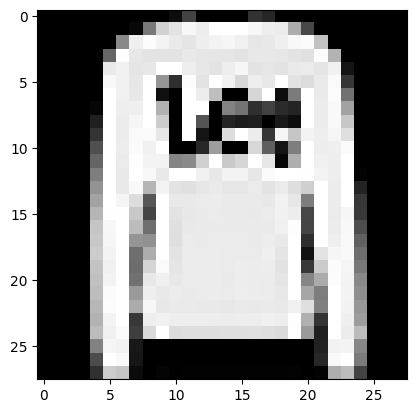

In [10]:
index = 1
first_img = tf.expand_dims(x_test[index], axis=0)
plt.imshow(first_img[0], cmap='gray')

prediction = model.predict(first_img, verbose=0)
predict_index = np.argmax(prediction)
print('Predicted category:', predict_index, fashion_mnist_labels[predict_index])
real_index = np.argmax(y_test[index])
print('Real category:', real_index, fashion_mnist_labels[real_index])

10 náhodných obrázkov z testovacej množiny.

Predikovaná kategória:
* zelená - správne
* červená - nesprávne

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


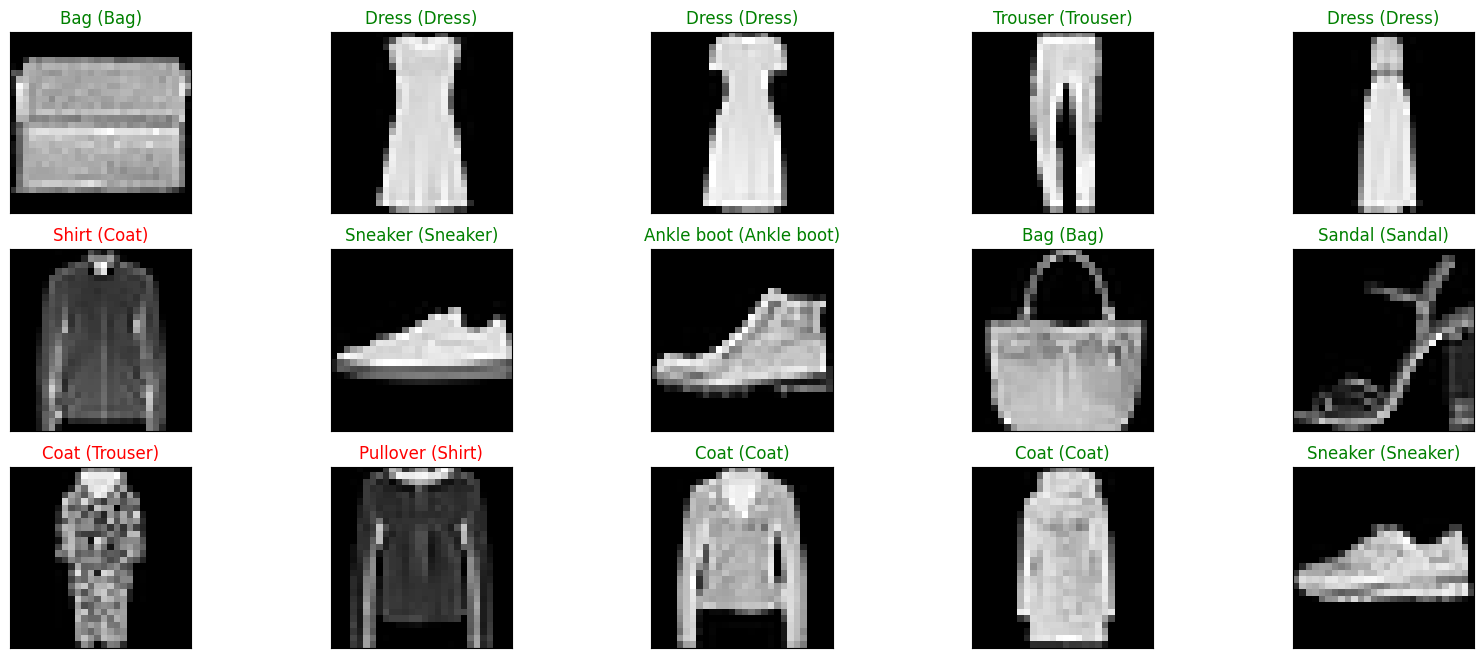

In [11]:
y_hat = model.predict(x_test)

# 10 random test images
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]), cmap='gray')
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

## Reálny obrázok

Predicted category: 3 Dress


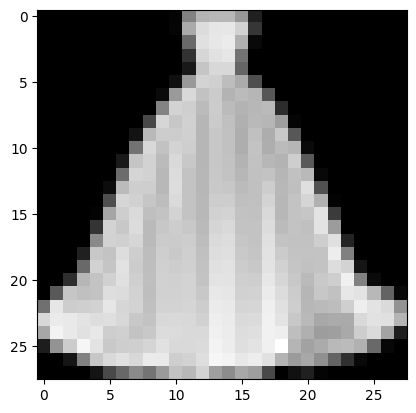

In [13]:
from PIL import Image
import requests

url = "https://m.media-amazon.com/images/I/51JpA4Olu4L._AC_UL1157_.jpg"

new_img = Image.open(requests.get(url, stream=True).raw).convert('L')
new_img = np.array(new_img.resize((28, 28)))  # resize image to 28x28
new_img = new_img.astype('float32') / 255
new_img = 1-new_img  # invert colors
new_img = tf.expand_dims(new_img, axis=0)
new_img = tf.expand_dims(new_img, axis=3)
plt.imshow(new_img[0], cmap='gray')

prediction = model.predict(new_img, verbose=0)
predict_index = np.argmax(prediction)
print('Predicted category:', predict_index, fashion_mnist_labels[predict_index])